# Лабораторная работа 8
Реализовать один из проекционных методов: метод Ритца или метод Галеркина.\
Сравнить решения при разных N (либо графически, либо выводить значения решений на достаточно частой сетке).

In [30]:
import seaborn as sns
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
from scipy.linalg import hilbert
import unittest
from parameterized import parameterized, parameterized_class
from tabulate import tabulate
import numpy.testing
import matplotlib as mpl
import functools
import scipy as sp
import scipy.special
import scipy.misc
import scipy.integrate

plt.style.use('default')
sns.color_palette('bright')

from math import sin, exp, sqrt

## Метод Галеркина

In [24]:
@functools.lru_cache(maxsize=None)
def jacobi(n):
    return lambda x: (1 - x**2) * sp.special.eval_jacobi(n, 1, 1, x)

def df(f, ord=1):
    return lambda x0: sp.misc.derivative(f, x0, n=ord, dx=1e-2)

# скалярное произведение
def dot(a, b, f, g):
    integrand = lambda x: f(x) * g(x)
    return sp.integrate.quad(integrand, a, b)[0]

def galerkin(a, b, p, q, r, f, N):
    L = lambda w: lambda x: p(x) * df(w, 2)(x) + q(x) * df(w)(x) + r(x) * w(x)
    L = np.vectorize(L)
    # набор базисных функций -- многочленов якоби, w
    w = [jacobi(i) for i in range(N)]
    Lw = L(w)
    lhs = np.zeros((N, N))
    rhs = np.zeros((N, 1))

    for i in range(N):
        for j in range(N):
            lhs[i, j] = dot(a, b, Lw[j], w[i])
        rhs[i] = dot(a, b, f, w[i])

    c = np.linalg.solve(lhs, rhs)
    return lambda x: sum(c[i] * w[i](x) for i in range(N))

In [25]:
def plot(a, b, p, q, r, f, N, start_from=2, expected=None):
    fix, ax = plt.subplots(1, 2, figsize=(20, 10), dpi=80)
    g = np.linspace(a, b, 100)
    solutions_ax = ax[0]
    solutions_ax.title.set_text('Найденные решения дифура для различных N')
    solutions_ax.set_xlabel('x', fontsize=20)
    solutions_ax.set_ylabel('y', fontsize=20)
    for n in range(start_from, N + 1):
        actual = galerkin(a, b, p, q, r, f, n)
        solutions_ax.plot(g, actual(g), label=f'N={n}')
    solutions_ax.legend(prop={'size': 13})

    expected_ax = ax[1]
    if expected != None:
        expected = np.vectorize(expected)
        expected_ax.plot(g, expected(g), label=f'Точное решение')
    expected_ax.title.set_text(f'Сравнение точного решения и решения найденного для N={N}')
    expected_ax.set_xlabel('x', fontsize=20)
    expected_ax.set_ylabel('y', fontsize=20)
    expected_ax.plot(g, actual(g), label=f'Решение для N={N}')
    expected_ax.legend(prop={'size': 13})

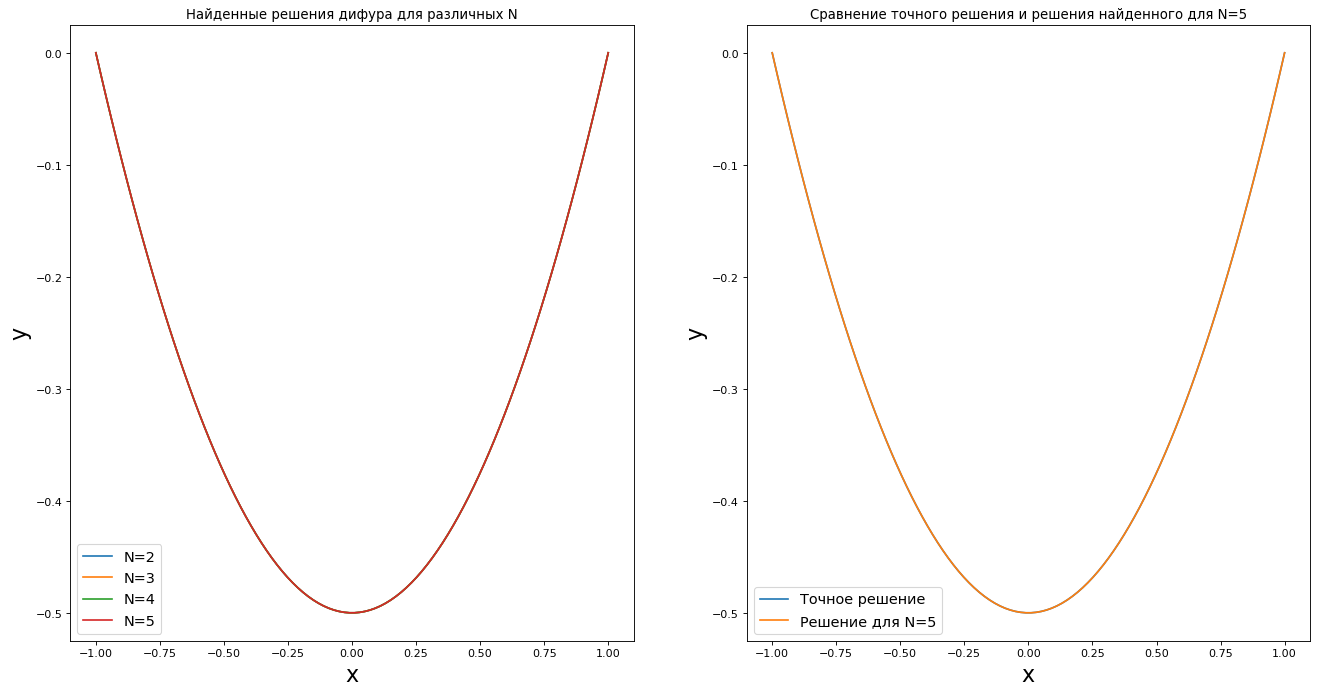

In [26]:
# u'' = 1
p = lambda x: 1
q = lambda x: 0
r = lambda x: 0
f = lambda x: 1
expected = lambda x: (x ** 2 - 1) / 2

plot(-1, 1, p, q, r, f, 5, expected=expected)

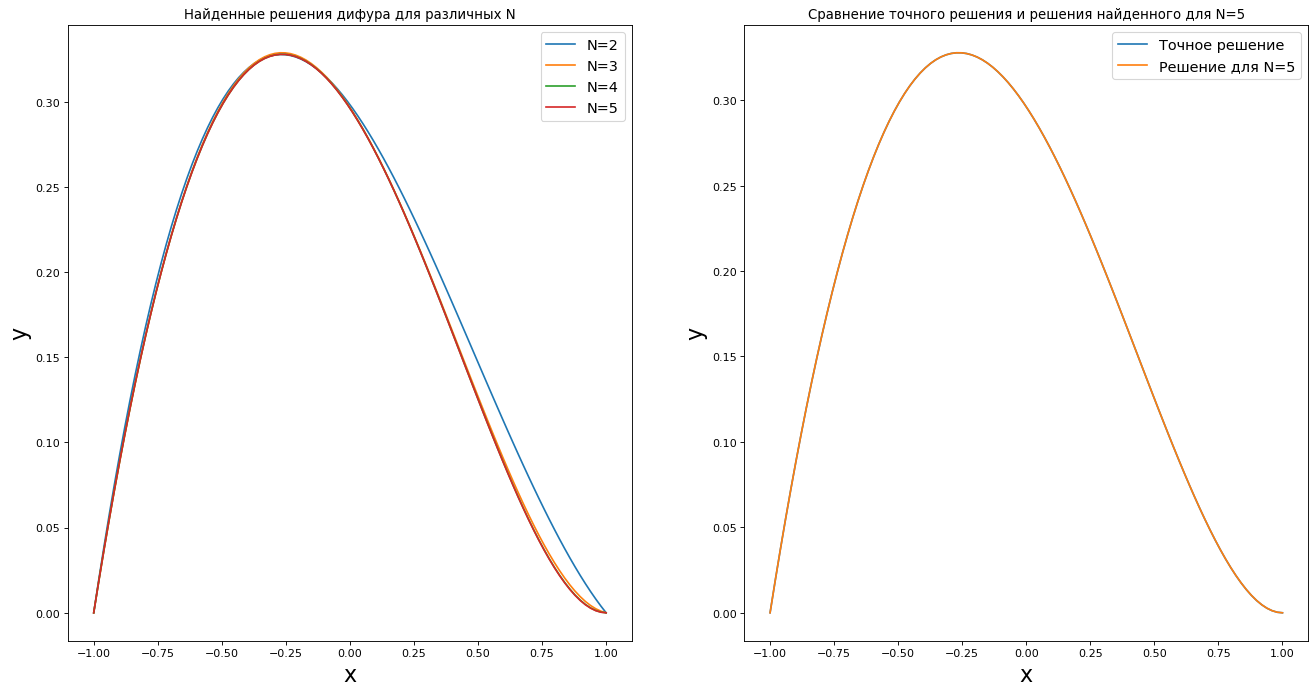

In [27]:
# {(x - 1) y''(x) - x y'(x) + y(x) = (x - 1)^2, y(-1) = 0, y(1) = 0}
p = lambda x: x - 1
q = lambda x: -x
r = lambda x: 1
f = lambda x: (x - 1) ** 2
expected = lambda x: -((x - 1)**2 - 4 * exp(x + 1) + math.e**2 * (x + 1)**2)/(1 + math.e**2)

plot(-1, 1, p, q, r, f, 5, expected=expected)

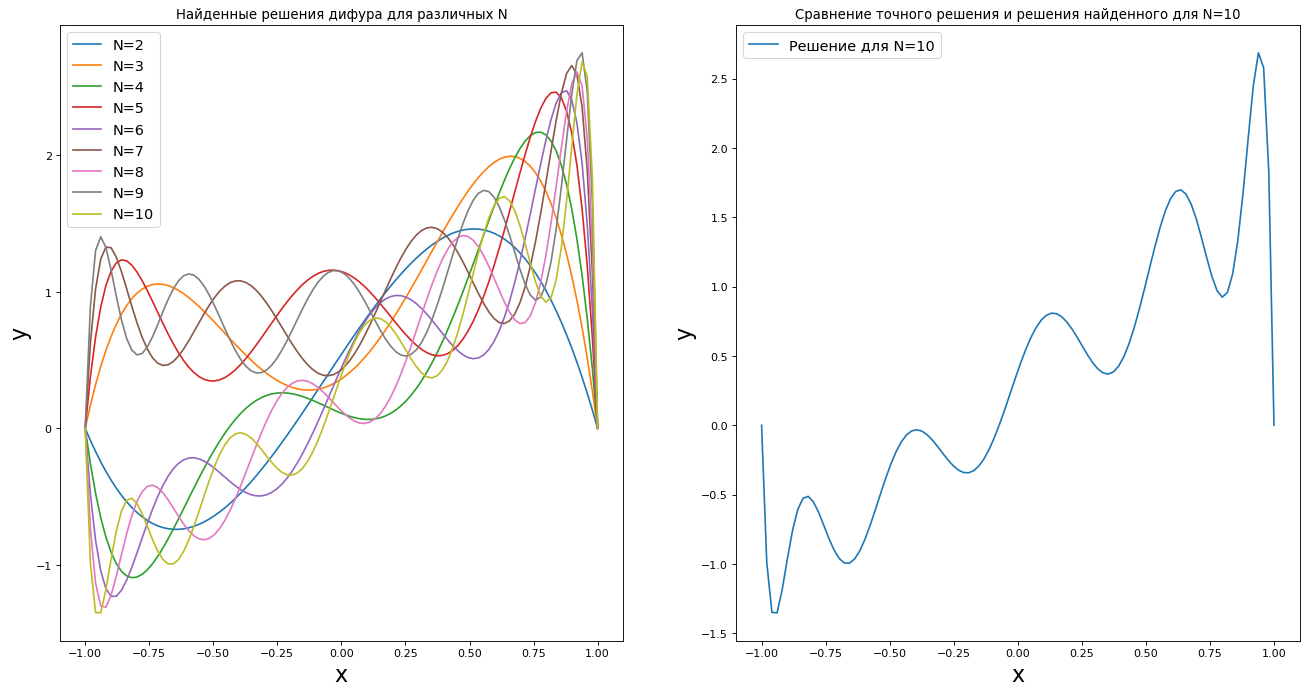

In [28]:
# 1/(2+x)y' + cos(x)y=1+x
p = lambda x: 0
q = lambda x: 1 / (2 + x)
r = lambda x: math.cos(x)
f = lambda x: 1 + x
plot(-1, 1, p, q, r, f, 10)

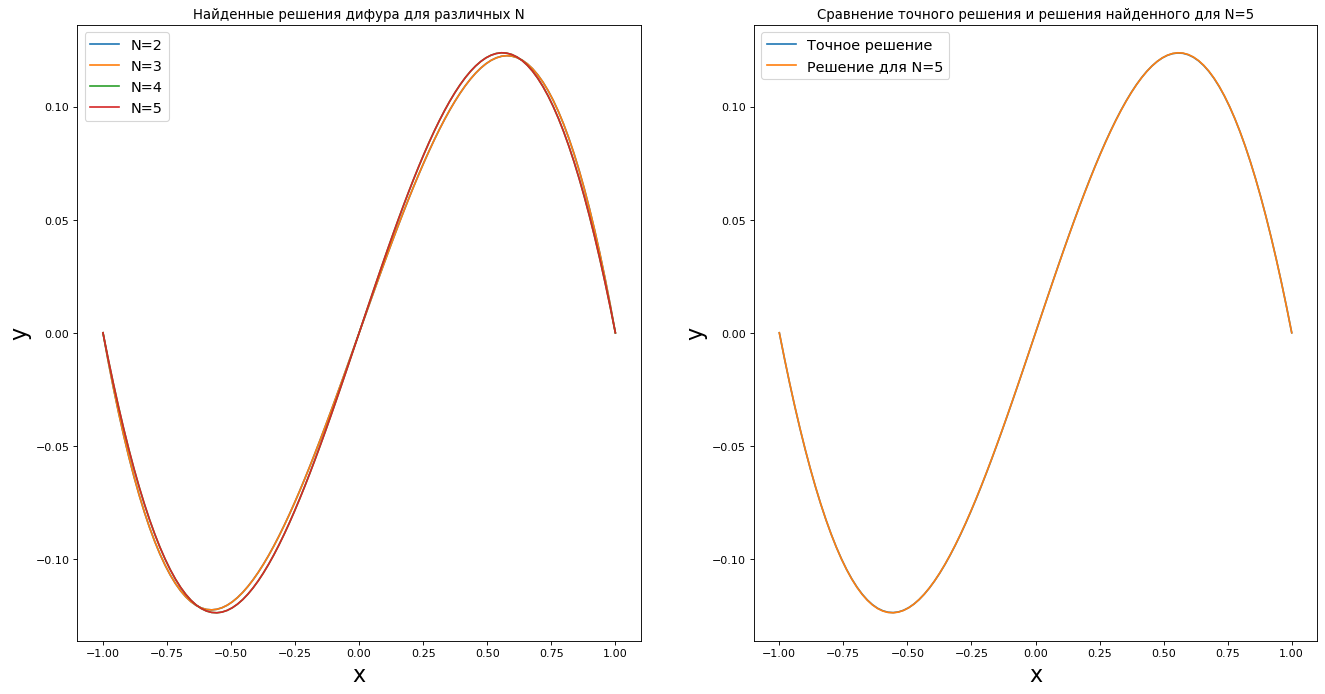

In [29]:
# {y''(x) + x y'(x) + 2 x = 0, y(-1) = y(1) = 0}
p = lambda x: 1
q = lambda x: x
r = lambda x: 0
f = lambda x: -2 * x
expected = lambda x: -2 * x + (2 * math.erf(x / sqrt(2))) / math.erf(1 / sqrt(2))
plot(-1, 1, p, q, r, f, 5, expected=expected)